<a href="https://colab.research.google.com/github/tinabonyadi/Bike_Sharing_ML_Project/blob/main/Bike_sharing_project_Tina_Bonyadi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings

In [ ]:
df = pd.read_csv('hour.csv')
df

instant      dteday  season  yr  mnth  hr  holiday  weekday  \
0            1  2011-01-01       1   0     1   0        0        6   
1            2  2011-01-01       1   0     1   1        0        6   
2            3  2011-01-01       1   0     1   2        0        6   
3            4  2011-01-01       1   0     1   3        0        6   
4            5  2011-01-01       1   0     1   4        0        6   
...        ...         ...     ...  ..   ...  ..      ...      ...   
17374    17375  2012-12-31       1   1    12  19        0        1   
17375    17376  2012-12-31       1   1    12  20        0        1   
17376    17377  2012-12-31       1   1    12  21        0        1   
17377    17378  2012-12-31       1   1    12  22        0        1   
17378    17379  2012-12-31       1   1    12  23        0        1   

       workingday  weathersit  temp   atemp   hum  windspeed  casual  \
0               0           1  0.24  0.2879  0.81     0.0000       3   
1               0           1  0.22  0.2727  0.80     0.0000       8   
2               0           1  0.22  0.2727  0.80     0.0000       5   
3               0           1  0.24  0.2879  0.75     0.0000       3   
4               0           1  0.24  0.2879  0.75     0.0000       0   
...           ...         ...   ...     ...   ...        ...     ...   
17374           1           2  0.26  0.2576  0.60     0.1642      11   
17375           1           2  0.26  0.2576  0.60     0.1642       8   
17376           1           1  0.26  0.2576  0.60     0.1642       7   
17377           1           1  0.26  0.2727  0.56     0.1343      13   
17378           1           1  0.26  0.2727  0.65     0.1343      12   

       registered  cnt  
0              13   16  
1              32   40  
2              27   32  
3              10   13  
4               1    1  
...           ...  ...  
17374         108  119  
17375          81   89  
17376          83   90  
17377          48   61  
17378          37   49  

[17379 rows x 17 columns]

In [ ]:
df.describe()

instant        season            yr          mnth            hr  \
count  17379.0000  17379.000000  17379.000000  17379.000000  17379.000000   
mean    8690.0000      2.501640      0.502561      6.537775     11.546752   
std     5017.0295      1.106918      0.500008      3.438776      6.914405   
min        1.0000      1.000000      0.000000      1.000000      0.000000   
25%     4345.5000      2.000000      0.000000      4.000000      6.000000   
50%     8690.0000      3.000000      1.000000      7.000000     12.000000   
75%    13034.5000      3.000000      1.000000     10.000000     18.000000   
max    17379.0000      4.000000      1.000000     12.000000     23.000000   

            holiday       weekday    workingday    weathersit          temp  \
count  17379.000000  17379.000000  17379.000000  17379.000000  17379.000000   
mean       0.028770      3.003683      0.682721      1.425283      0.496987   
std        0.167165      2.005771      0.465431      0.639357      0.192556   
min        0.000000      0.000000      0.000000      1.000000      0.020000   
25%        0.000000      1.000000      0.000000      1.000000      0.340000   
50%        0.000000      3.000000      1.000000      1.000000      0.500000   
75%        0.000000      5.000000      1.000000      2.000000      0.660000   
max        1.000000      6.000000      1.000000      4.000000      1.000000   

              atemp           hum     windspeed        casual    registered  \
count  17379.000000  17379.000000  17379.000000  17379.000000  17379.000000   
mean       0.475775      0.627229      0.190098     35.676218    153.786869   
std        0.171850      0.192930      0.122340     49.305030    151.357286   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.333300      0.480000      0.104500      4.000000     34.000000   
50%        0.484800      0.630000      0.194000     17.000000    115.000000   
75%        0.621200      0.780000      0.253700     48.000000    220.000000   
max        1.000000      1.000000      0.850700    367.000000    886.000000   

                cnt  
count  17379.000000  
mean     189.463088  
std      181.387599  
min        1.000000  
25%       40.000000  
50%      142.000000  
75%      281.000000  
max      977.000000

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [ ]:
!pip install pycaret[full]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 484.7/484.7 kB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 13.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 12.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 70.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 kB 12.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 73.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.5/160.5 kB 22.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 18.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 14.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 72.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.8/101.8 kB 17.8 

In [ ]:
import pycaret
pycaret.__version__

'3.2.0'

In [ ]:
from pycaret.datasets import get_data
df = get_data('hour')

instant      dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1   0        0        6           0   
1        2  2011-01-01       1   0     1   1        0        6           0   
2        3  2011-01-01       1   0     1   2        0        6           0   
3        4  2011-01-01       1   0     1   3        0        6           0   
4        5  2011-01-01       1   0     1   4        0        6           0   

   weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  
0           1  0.24  0.2879  0.81        0.0       3          13   16  
1           1  0.22  0.2727  0.80        0.0       8          32   40  
2           1  0.22  0.2727  0.80        0.0       5          27   32  
3           1  0.24  0.2879  0.75        0.0       3          10   13  
4           1  0.24  0.2879  0.75        0.0       0           1    1

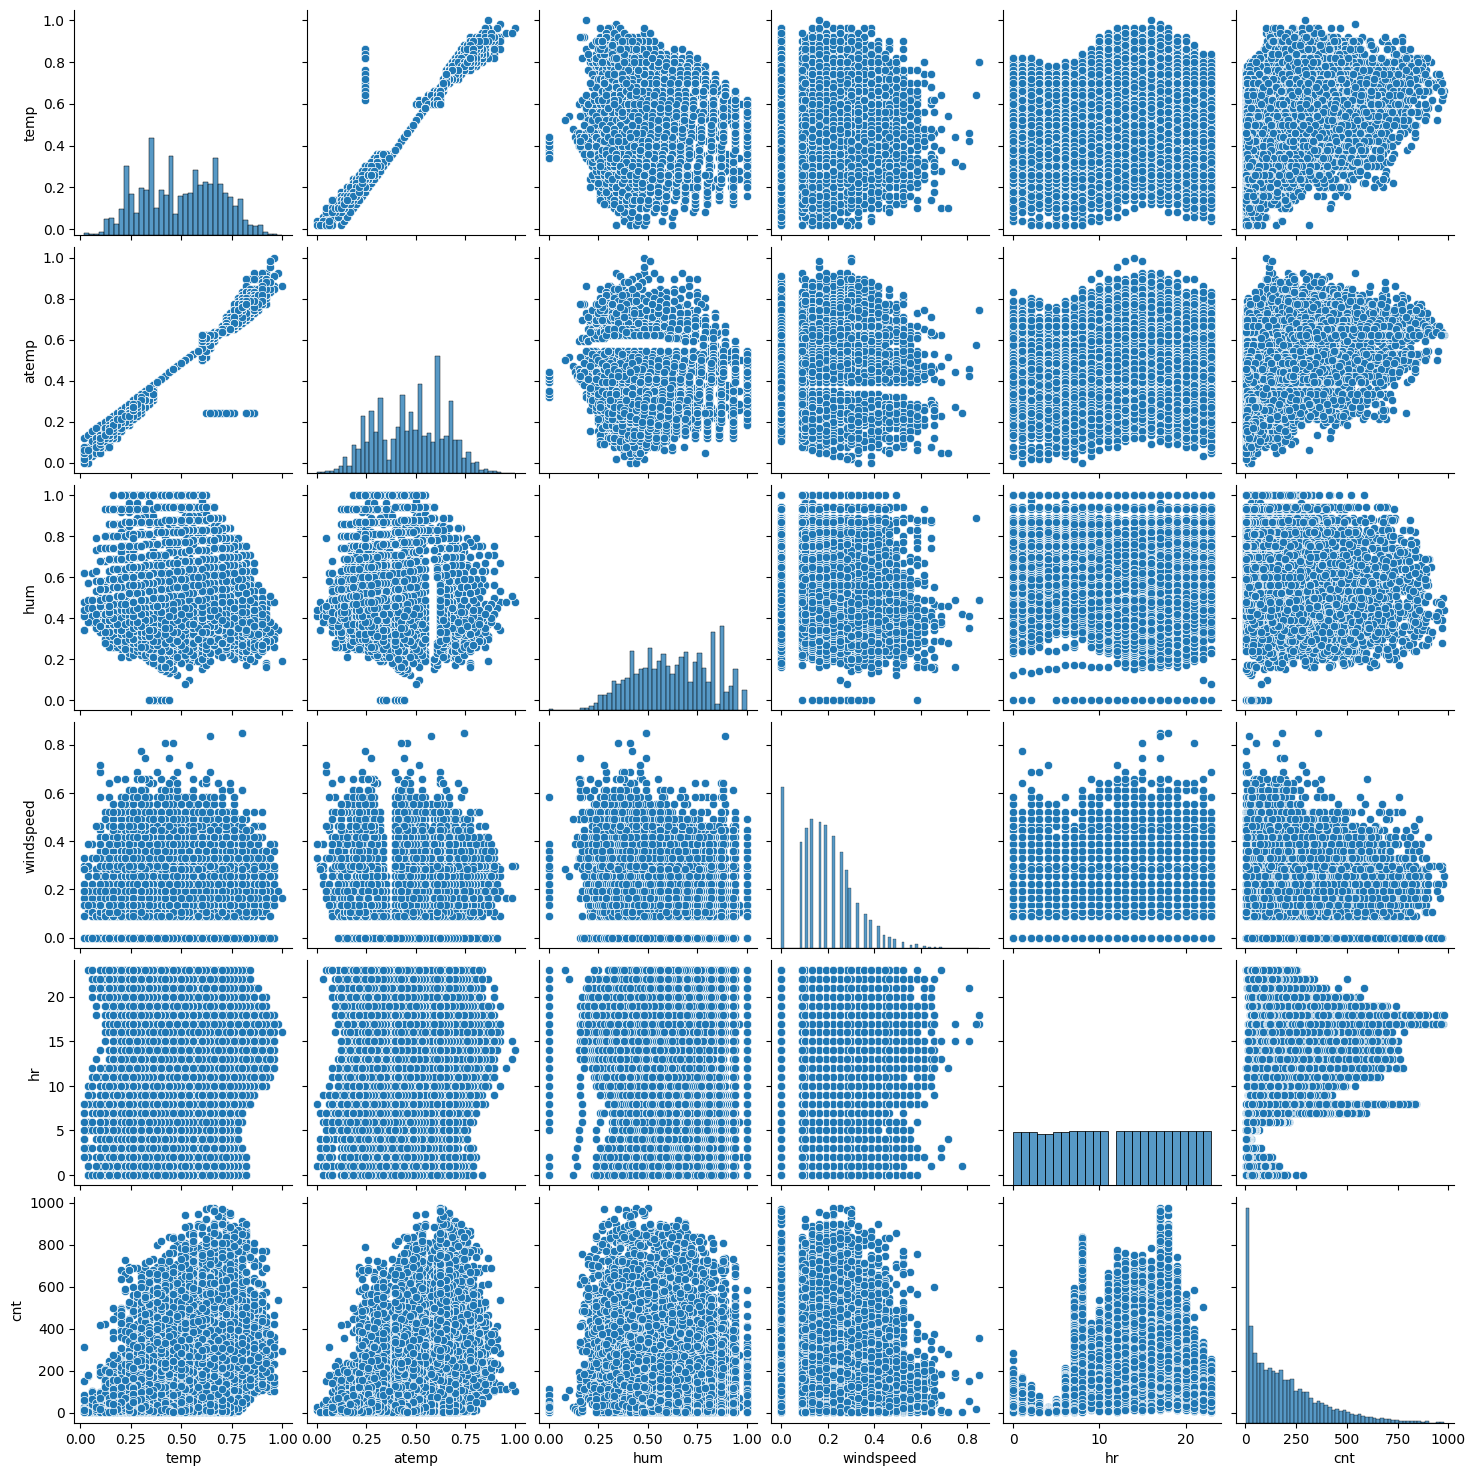

In [ ]:
sns.pairplot(df[['temp','atemp','hum','windspeed','hr','cnt']])

**Comment:**

1.   temp and atemp are almost the same, so we can drop one of them and I choose atemp to drop



In [ ]:
redundant_columns = ['instant', 'dteday', 'casual', 'atemp', 'registered']
df.drop(columns=redundant_columns, inplace=True)

**Comment:**

1.   instant is redundant because it just count the number of data we have
2.   dteday is redundant because we have it already in columns such as mnth, day, etc.
3.   sum of the casual and registered columns is cnt which is our target, so we can drop them.
4.   temp and atemp are almost the same, so we can drop one of them and I choose atemp to drop





In [ ]:
df

season  yr  mnth  hr  holiday  weekday  workingday  weathersit  temp  \
0           1   0     1   0        0        6           0           1  0.24   
1           1   0     1   1        0        6           0           1  0.22   
2           1   0     1   2        0        6           0           1  0.22   
3           1   0     1   3        0        6           0           1  0.24   
4           1   0     1   4        0        6           0           1  0.24   
...       ...  ..   ...  ..      ...      ...         ...         ...   ...   
17374       1   1    12  19        0        1           1           2  0.26   
17375       1   1    12  20        0        1           1           2  0.26   
17376       1   1    12  21        0        1           1           1  0.26   
17377       1   1    12  22        0        1           1           1  0.26   
17378       1   1    12  23        0        1           1           1  0.26   

        hum  windspeed  cnt  
0      0.81     0.0000   16  
1      0.80     0.0000   40  
2      0.80     0.0000   32  
3      0.75     0.0000   13  
4      0.75     0.0000    1  
...     ...        ...  ...  
17374  0.60     0.1642  119  
17375  0.60     0.1642   89  
17376  0.60     0.1642   90  
17377  0.56     0.1343   61  
17378  0.65     0.1343   49  

[17379 rows x 12 columns]

In [ ]:
df.nunique()

season          4
yr              2
mnth           12
hr             24
holiday         2
weekday         7
workingday      2
weathersit      4
temp           50
hum            89
windspeed      30
cnt           869
dtype: int64

In [ ]:
df.isnull().sum()

season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
hum           0
windspeed     0
cnt           0
dtype: int64

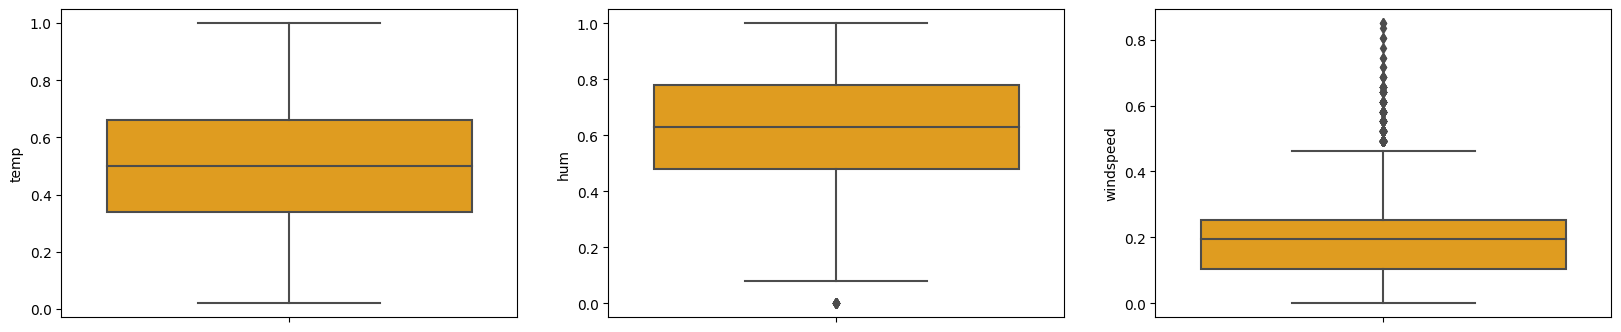

In [ ]:
warnings.filterwarnings('ignore')
%matplotlib inline
columns = ['temp', 'hum', 'windspeed']
plt.figure(figsize=(20,4))

i = 1
for col in columns:
    plt.subplot(1,3,i)
    sns.boxplot(y=col, data=df, color='Orange')
    i+=1

Comment:


1.   Now we sure that there is no outliers in the using dataset

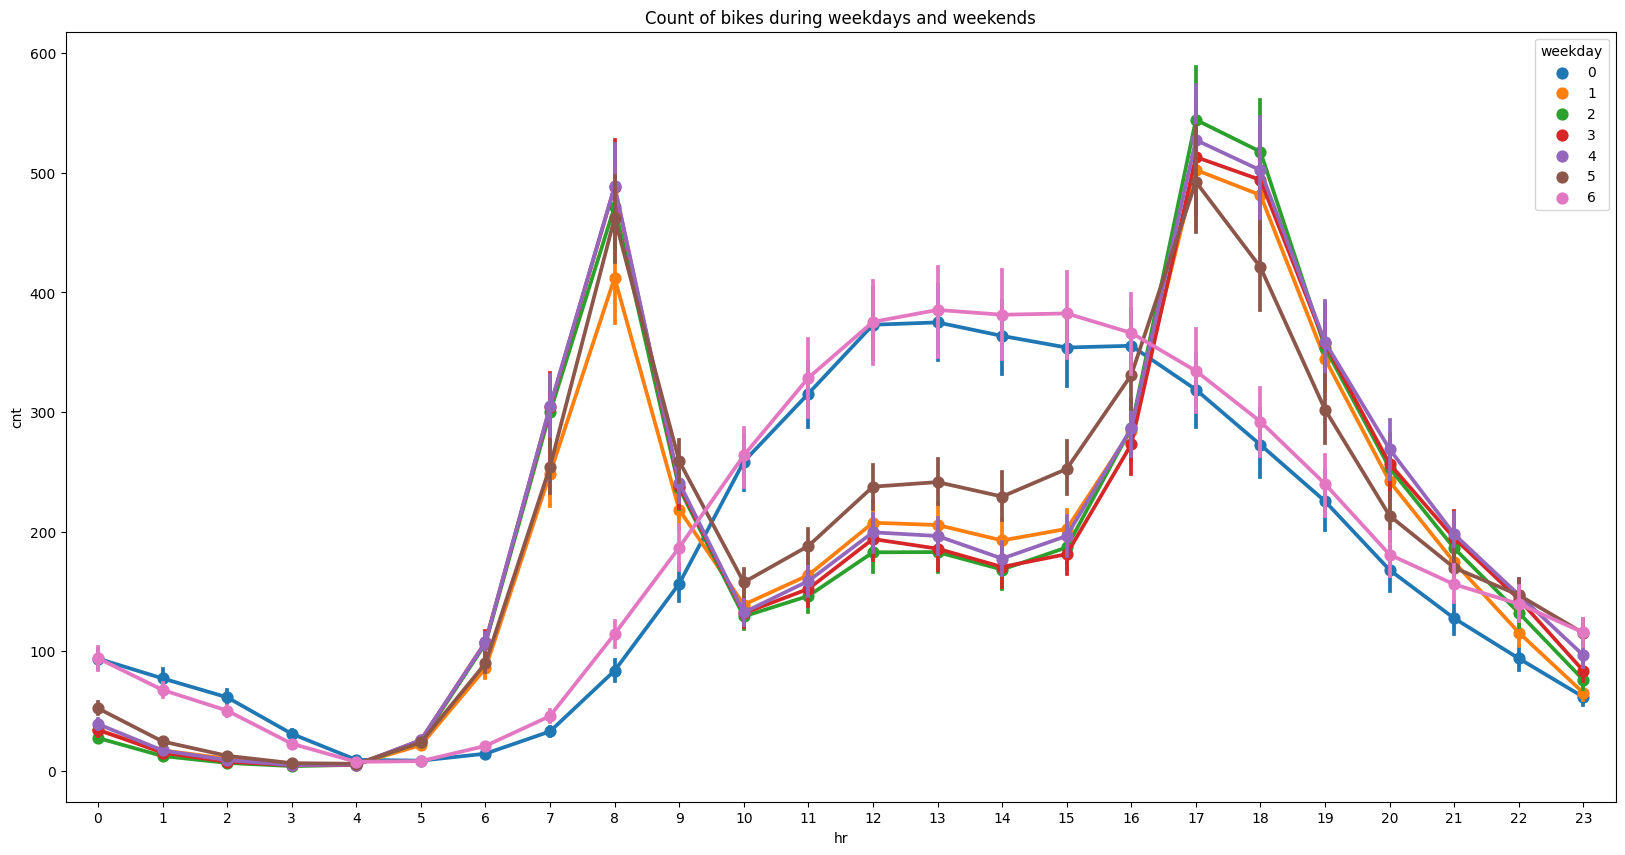

In [ ]:
fig, ax = plt.subplots(figsize=(20,10))
sns.pointplot(data=df, x='hr', y='cnt', hue='weekday', ax=ax)
ax.set(title='Count of bikes during weekdays and weekends')
plt.show()

[Text(0.5, 1.0, 'Count of bikes during different seasons')]

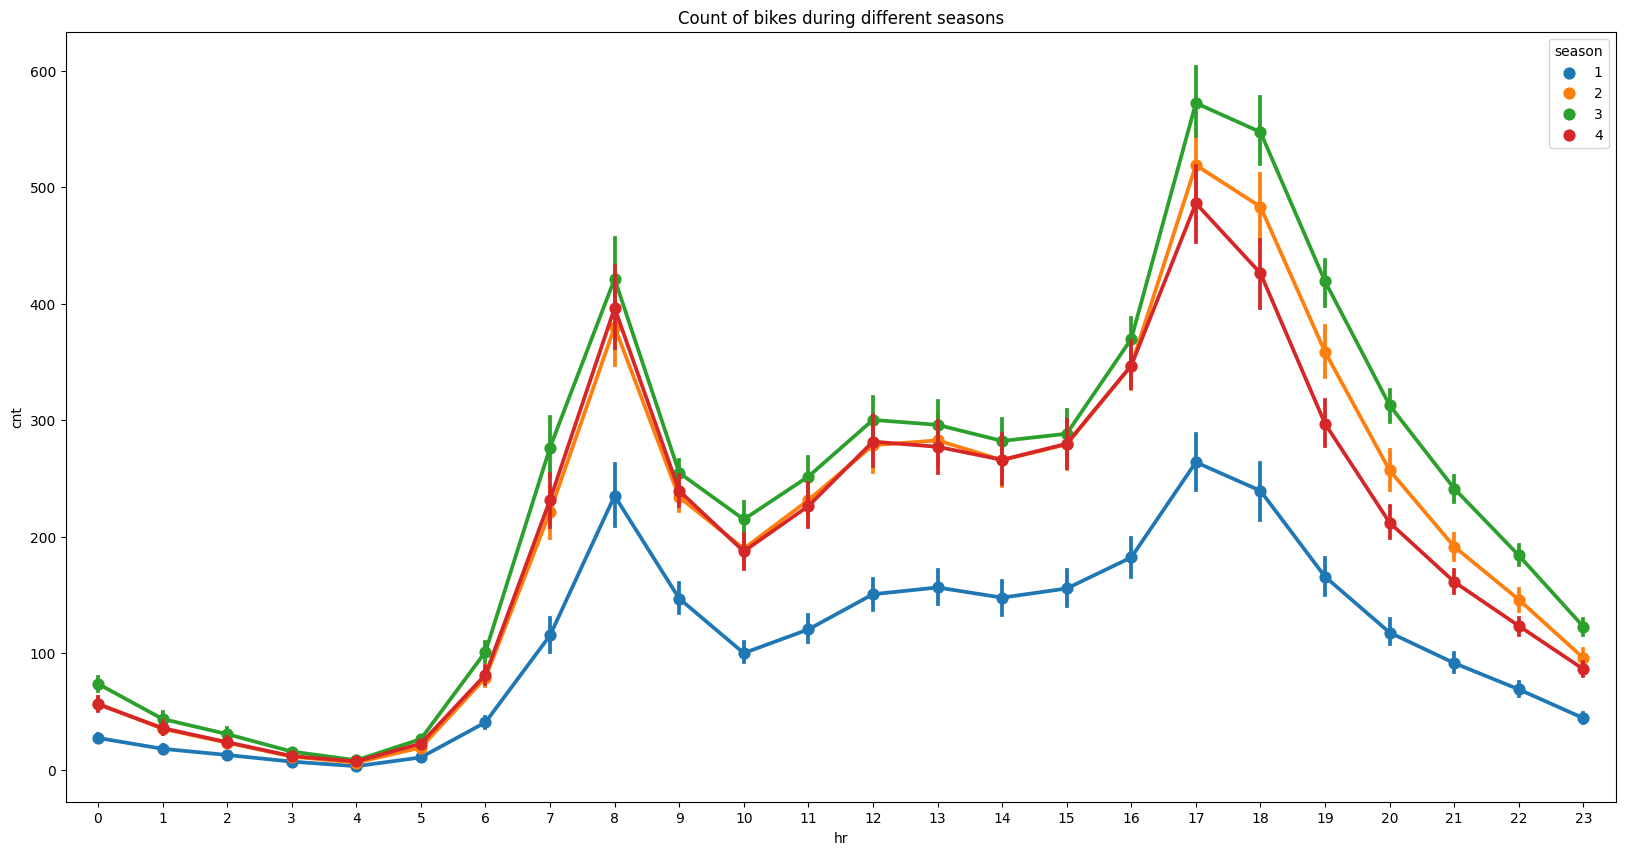

In [ ]:
fig, ax = plt.subplots(figsize=(20,10))
sns.pointplot(data=df, x='hr', y='cnt', hue='season', ax=ax)
ax.set(title='Count of bikes during different seasons')

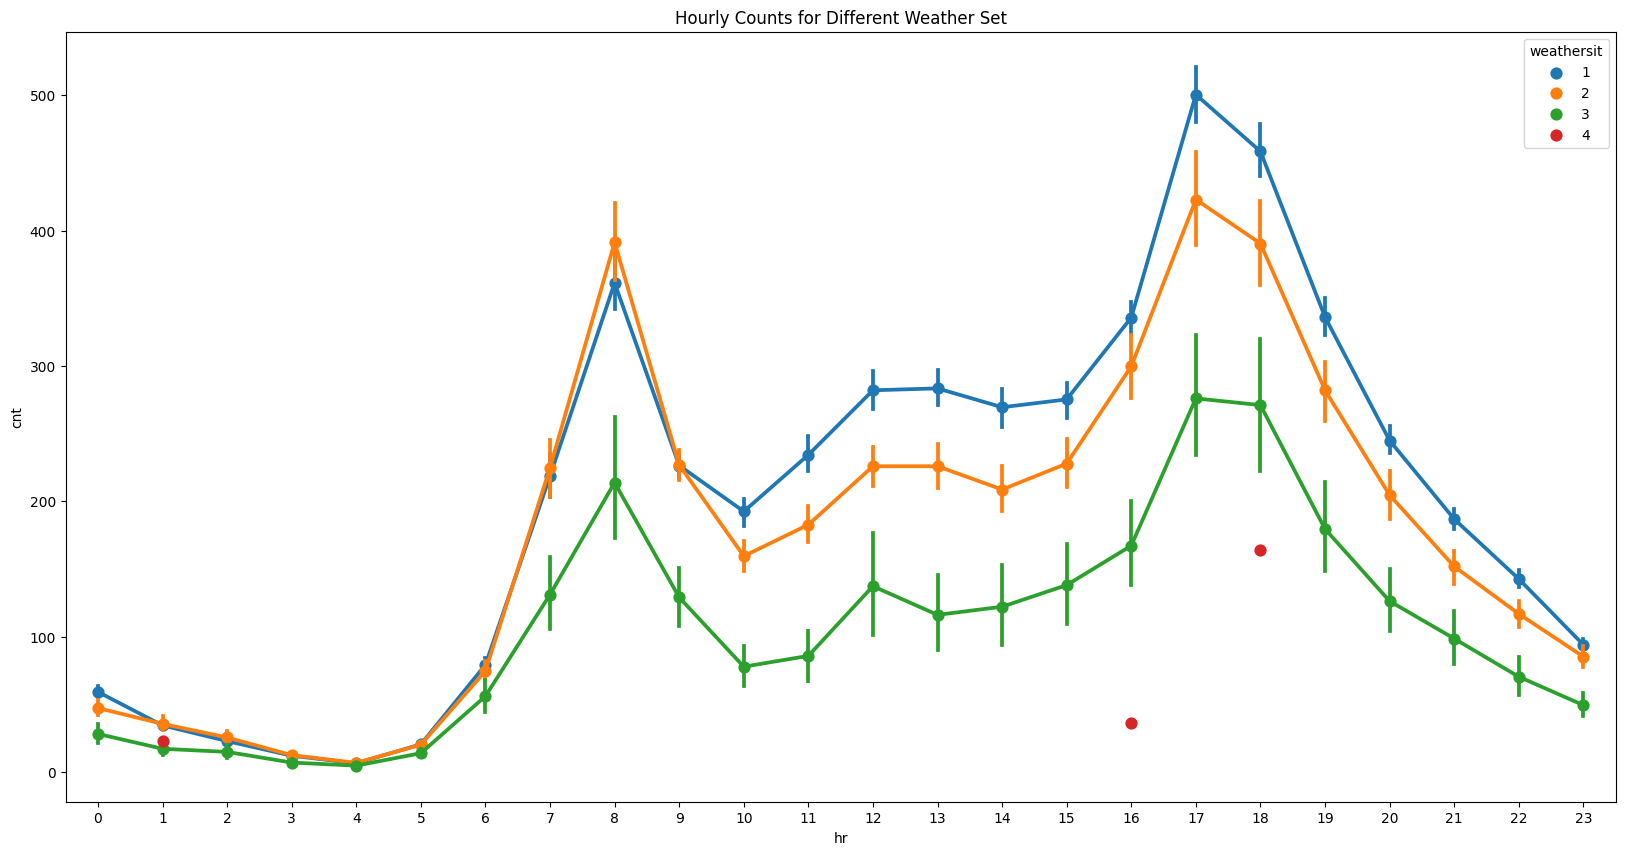

In [ ]:
fig, ax = plt.subplots(figsize=(20,10))
sns.pointplot(data=df, x='hr', y='cnt', hue='weathersit', ax=ax)
ax.set(title='Hourly Counts for Different Weather Set')
plt.show()

[Text(0.5, 1.0, 'Count of bikes during different months')]

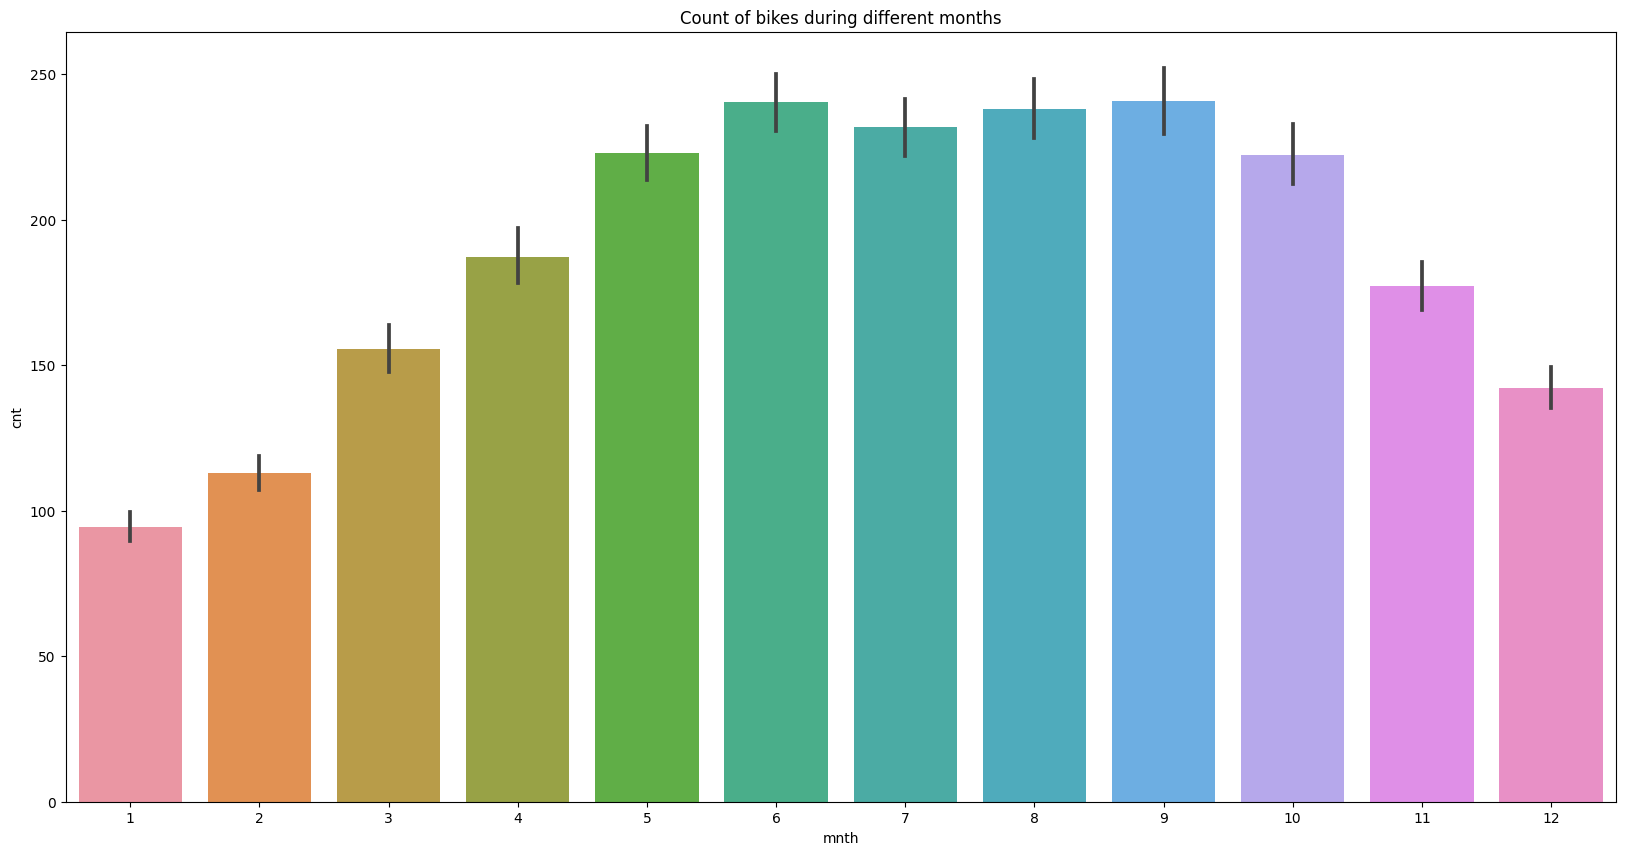

In [ ]:
fig, ax = plt.subplots(figsize=(20,10))
sns.barplot(data=df, x='mnth', y='cnt', ax=ax)
ax.set(title='Count of bikes during different months')

[Text(0.5, 1.0, 'Count of bikes during different hours')]

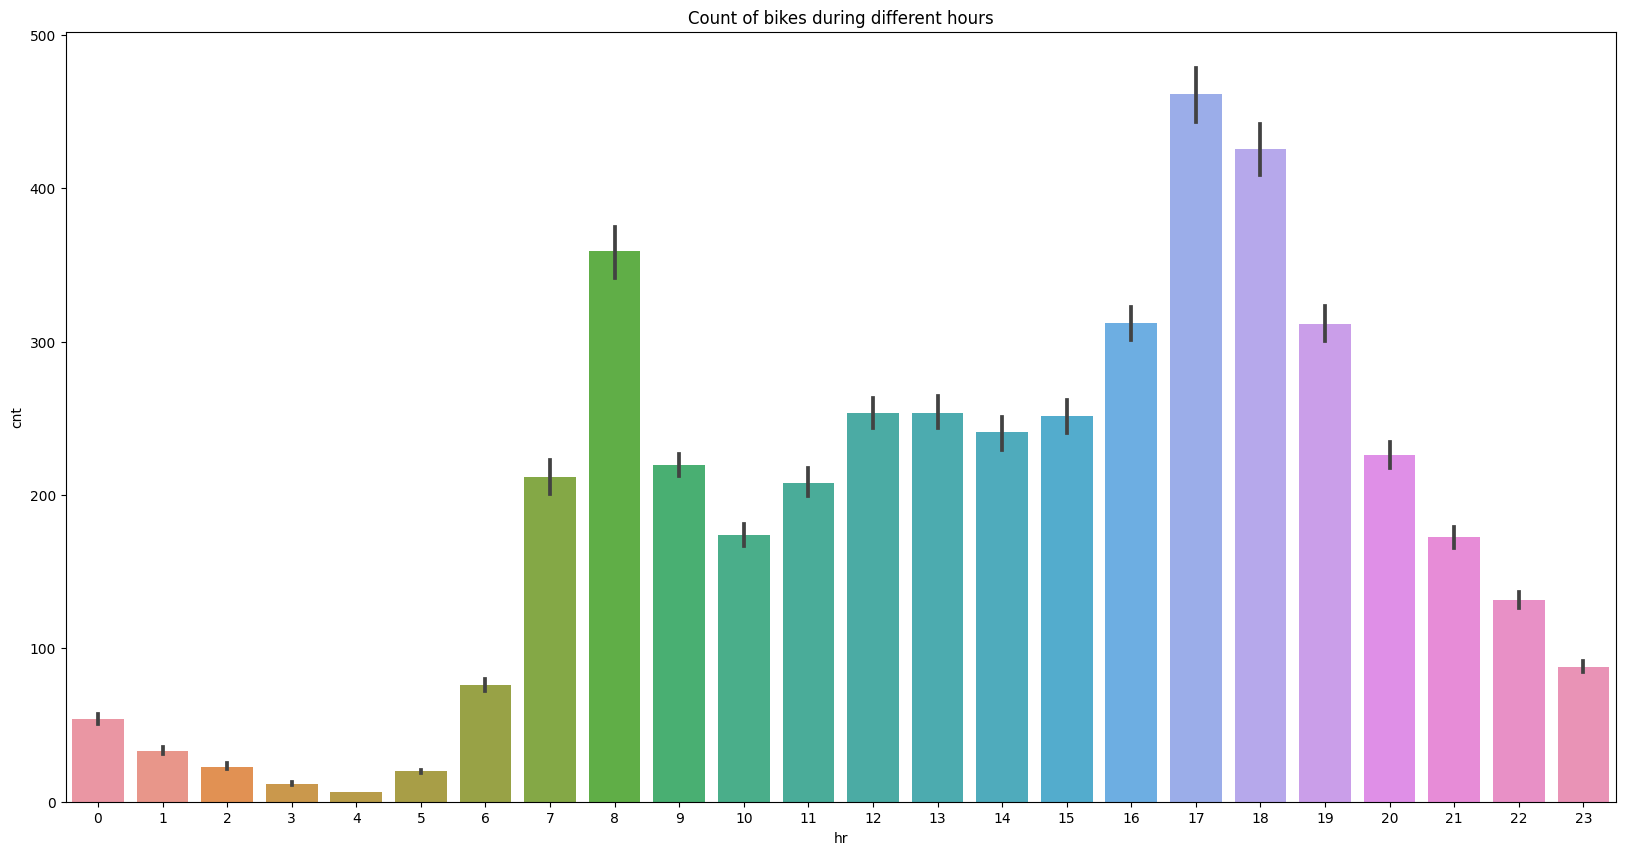

In [ ]:
fig, ax = plt.subplots(figsize=(20,10))
sns.barplot(data=df, x='hr', y='cnt', ax=ax)
ax.set(title='Count of bikes during different hours')

In [ ]:
def categorize_hour(hour):
    if 0 <= hour < 6:
        return 'night'
    elif 6 <= hour < 12:
        return 'morning'
    elif 12 <= hour < 18:
        return 'afternoon'
    else:
        return 'evening'
df['day_division'] = df['hr'].apply(categorize_hour)

In [ ]:
# One_Hot Encoding
df = pd.get_dummies(df, columns=['yr', 'season', 'mnth' , 'holiday', 'weekday', 'workingday', 'weathersit'])

In [ ]:
df.head()

hr  temp   hum  windspeed  cnt day_division  yr_0  yr_1  season_1  \
0   0  0.24  0.81        0.0   16        night     1     0         1   
1   1  0.22  0.80        0.0   40        night     1     0         1   
2   2  0.22  0.80        0.0   32        night     1     0         1   
3   3  0.24  0.75        0.0   13        night     1     0         1   
4   4  0.24  0.75        0.0    1        night     1     0         1   

   season_2  ...  weekday_3  weekday_4  weekday_5  weekday_6  workingday_0  \
0         0  ...          0          0          0          1             1   
1         0  ...          0          0          0          1             1   
2         0  ...          0          0          0          1             1   
3         0  ...          0          0          0          1             1   
4         0  ...          0          0          0          1             1   

   workingday_1  weathersit_1  weathersit_2  weathersit_3  weathersit_4  
0             0             1             0             0             0  
1             0             1             0             0             0  
2             0             1             0             0             0  
3             0             1             0             0             0  
4             0             1             0             0             0  

[5 rows x 39 columns]

In [ ]:
df.shape

(17379, 39)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 39 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   hr            17379 non-null  int64  
 1   temp          17379 non-null  float64
 2   hum           17379 non-null  float64
 3   windspeed     17379 non-null  float64
 4   cnt           17379 non-null  int64  
 5   day_division  17379 non-null  object 
 6   yr_0          17379 non-null  uint8  
 7   yr_1          17379 non-null  uint8  
 8   season_1      17379 non-null  uint8  
 9   season_2      17379 non-null  uint8  
 10  season_3      17379 non-null  uint8  
 11  season_4      17379 non-null  uint8  
 12  mnth_1        17379 non-null  uint8  
 13  mnth_2        17379 non-null  uint8  
 14  mnth_3        17379 non-null  uint8  
 15  mnth_4        17379 non-null  uint8  
 16  mnth_5        17379 non-null  uint8  
 17  mnth_6        17379 non-null  uint8  
 18  mnth_7        17379 non-nu

In [ ]:
df.to_csv('preprocessed_dataset_final.csv')

In [ ]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

num_vars = ['temp','hum','windspeed']
df[num_vars] = scaler.fit_transform(df[num_vars])

In [ ]:
df

hr      temp       hum  windspeed  cnt day_division  yr_0  yr_1  \
0       0 -1.334648  0.947372  -1.553889   16        night     1     0   
1       1 -1.438516  0.895539  -1.553889   40        night     1     0   
2       2 -1.438516  0.895539  -1.553889   32        night     1     0   
3       3 -1.334648  0.636370  -1.553889   13        night     1     0   
4       4 -1.334648  0.636370  -1.553889    1        night     1     0   
...    ..       ...       ...        ...  ...          ...   ...   ...   
17374  19 -1.230779 -0.141137  -0.211691  119      evening     0     1   
17375  20 -1.230779 -0.141137  -0.211691   89      evening     0     1   
17376  21 -1.230779 -0.141137  -0.211691   90      evening     0     1   
17377  22 -1.230779 -0.348473  -0.456099   61      evening     0     1   
17378  23 -1.230779  0.118032  -0.456099   49      evening     0     1   

       season_1  season_2  ...  weekday_3  weekday_4  weekday_5  weekday_6  \
0             1         0  ...          0          0          0          1   
1             1         0  ...          0          0          0          1   
2             1         0  ...          0          0          0          1   
3             1         0  ...          0          0          0          1   
4             1         0  ...          0          0          0          1   
...         ...       ...  ...        ...        ...        ...        ...   
17374         1         0  ...          0          0          0          0   
17375         1         0  ...          0          0          0          0   
17376         1         0  ...          0          0          0          0   
17377         1         0  ...          0          0          0          0   
17378         1         0  ...          0          0          0          0   

       workingday_0  workingday_1  weathersit_1  weathersit_2  weathersit_3  \
0                 1             0             1             0             0   
1                 1             0             1             0             0   
2                 1             0             1             0             0   
3                 1             0             1             0             0   
4                 1             0             1             0             0   
...             ...           ...           ...           ...           ...   
17374             0             1             0             1             0   
17375             0             1             0             1             0   
17376             0             1             1             0             0   
17377             0             1             1             0             0   
17378             0             1             1             0             0   

       weathersit_4  
0                 0  
1                 0  
2                 0  
3                 0  
4                 0  
...             ...  
17374             0  
17375             0  
17376             0  
17377             0  
17378             0  

[17379 rows x 39 columns]

In [ ]:
from sklearn.model_selection import train_test_split
X = df.drop('cnt', axis=1)
y = df['cnt']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

<Axes: >

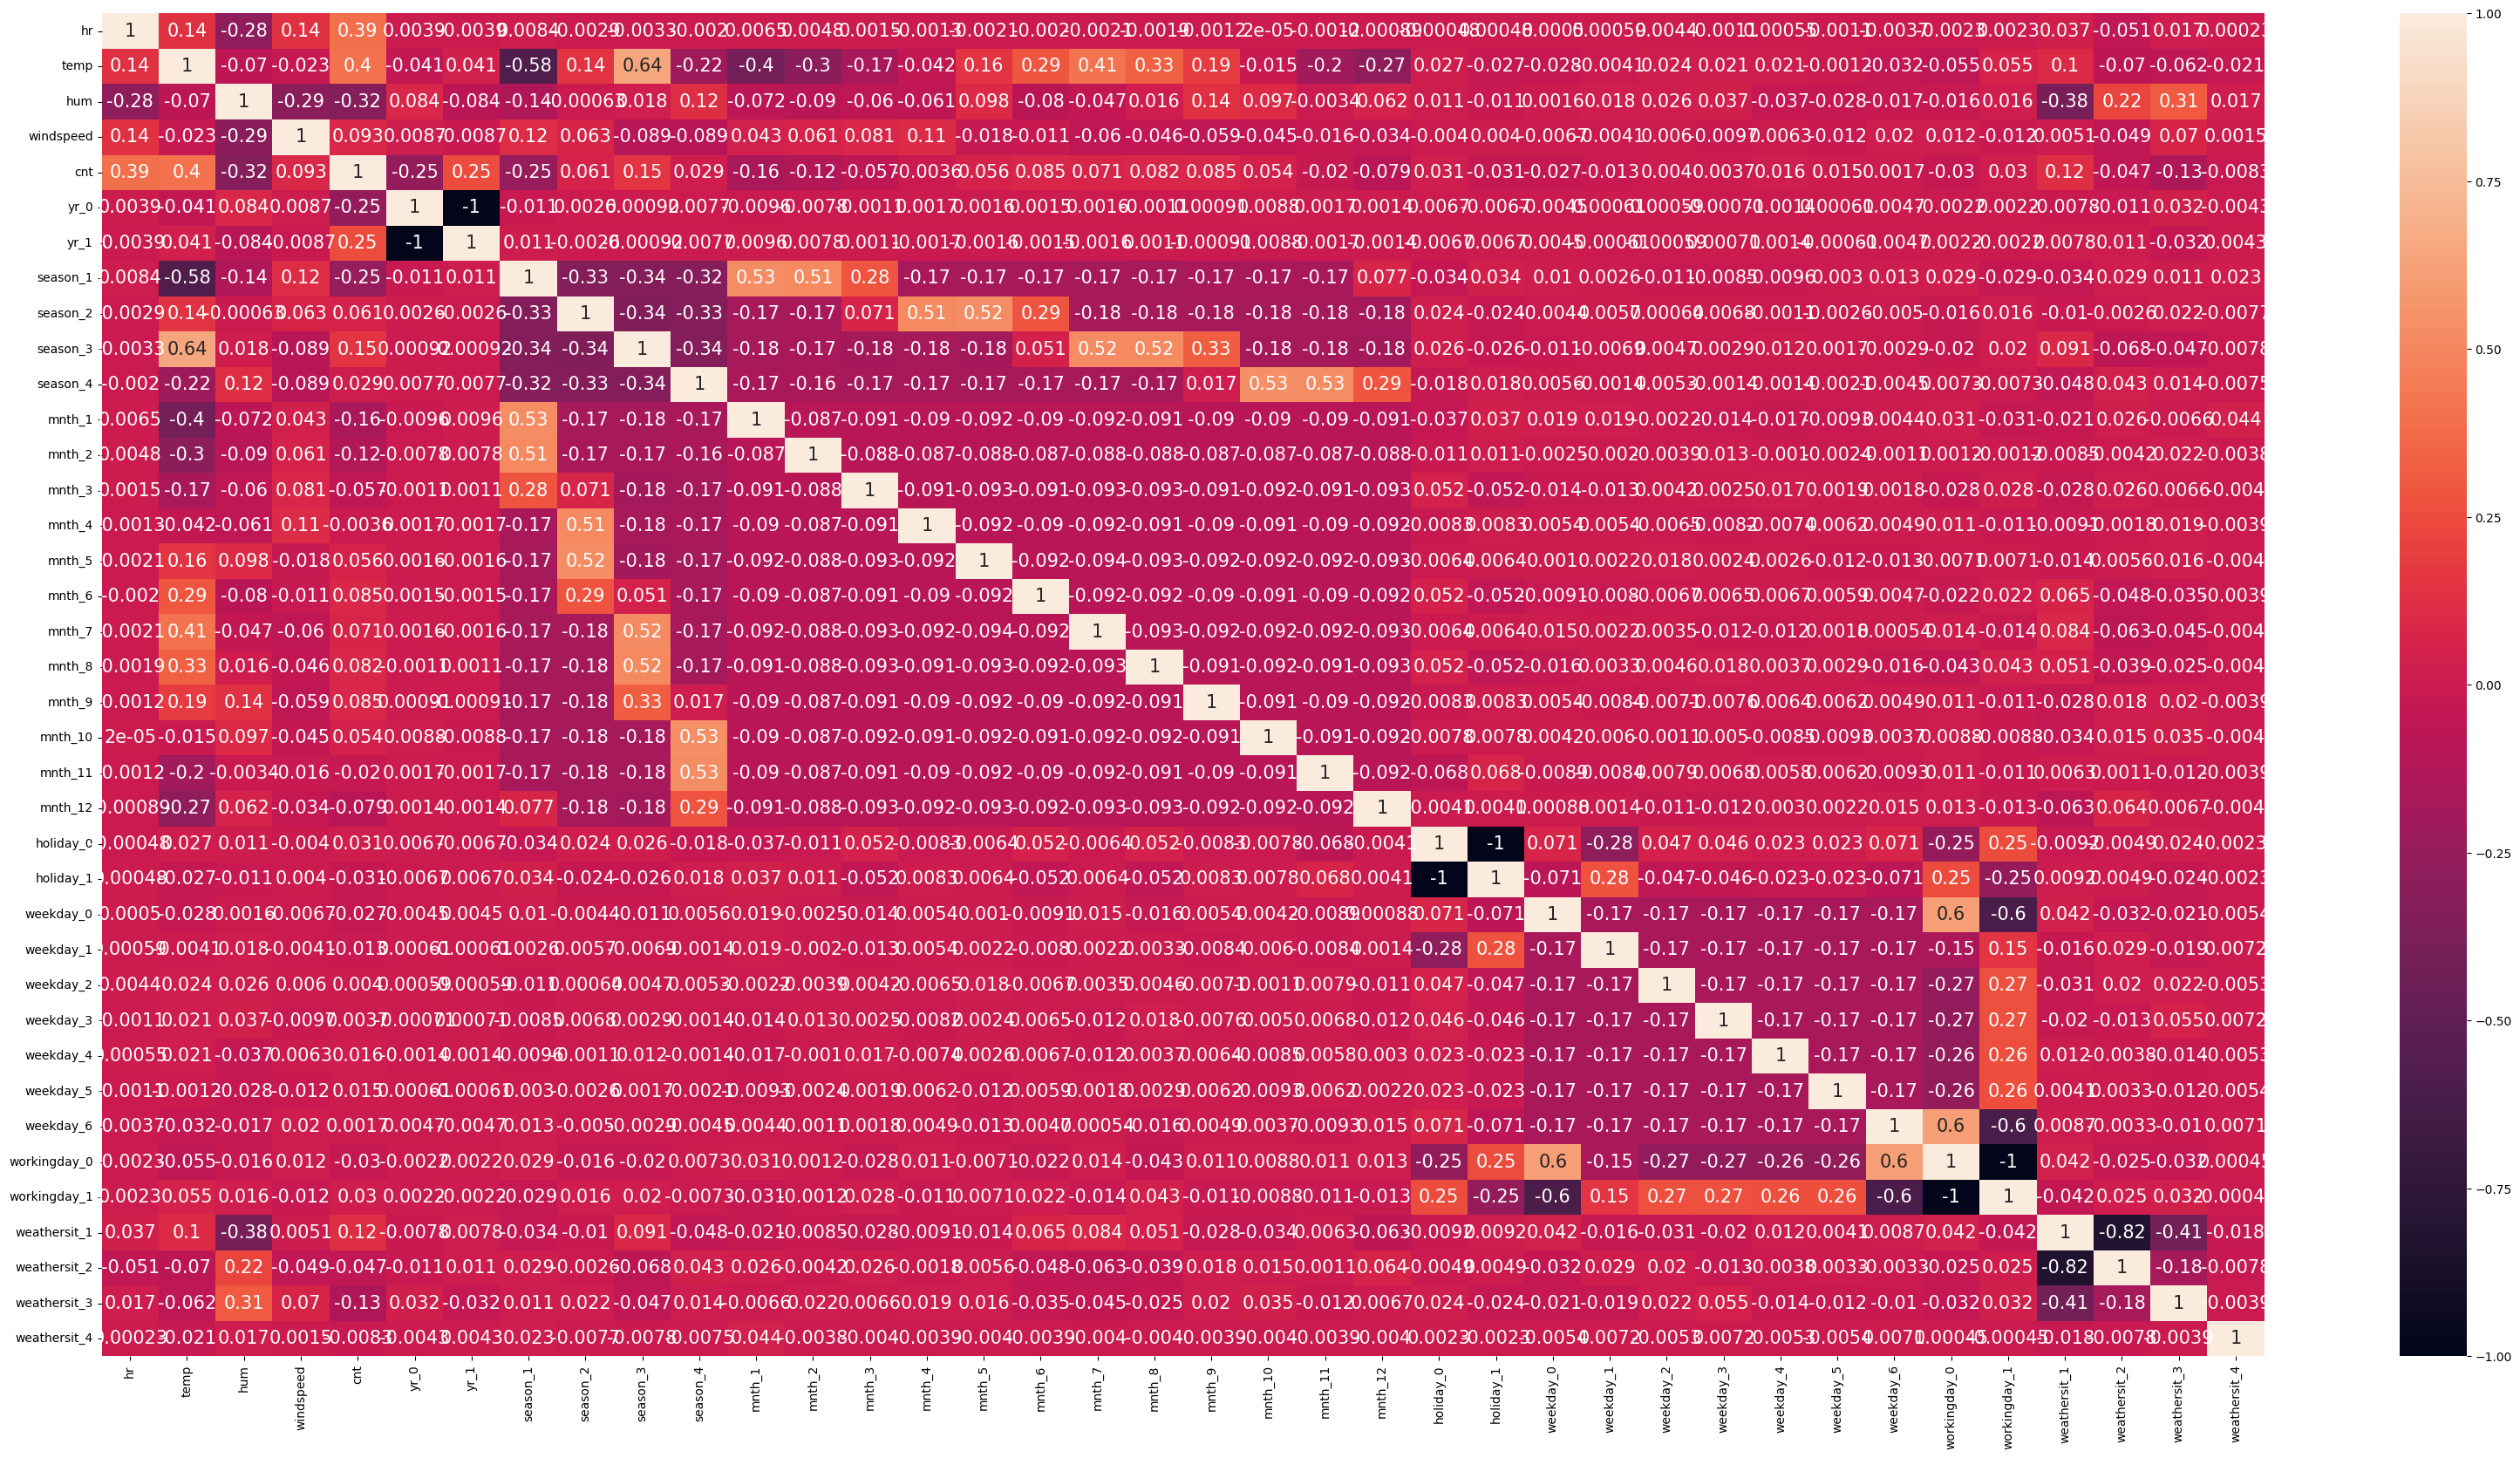

In [ ]:
cor = df.corr()
plt.figure(figsize=(40,20))
sns.heatmap(cor, annot=True, annot_kws={'size':15})

In [ ]:
#Functional API
from pycaret.regression import *
s = setup(df, target = 'cnt', session_id = 123)

In [ ]:
#Object Oriented API
from pycaret.regression import RegressionExperiment
exp=RegressionExperiment()
type(exp)
exp.setup(df, target='cnt', session_id=123)

In [ ]:
s = setup(df, target = 'cnt', session_id = 123, normalize = True, normalize_method = 'minmax')

In [ ]:
get_config()

{'USI',
 'X',
 'X_test',
 'X_test_transformed',
 'X_train',
 'X_train_transformed',
 'X_transformed',
 '_available_plots',
 '_ml_usecase',
 'data',
 'dataset',
 'dataset_transformed',
 'exp_id',
 'exp_name_log',
 'fold_generator',
 'fold_groups_param',
 'fold_shuffle_param',
 'gpu_n_jobs_param',
 'gpu_param',
 'html_param',
 'idx',
 'is_multiclass',
 'log_plots_param',
 'logging_param',
 'memory',
 'n_jobs_param',
 'pipeline',
 'seed',
 'target_param',
 'test',
 'test_transformed',
 'train',
 'train_transformed',
 'transform_target_param',
 'variable_and_property_keys',
 'variables',
 'y',
 'y_test',
 'y_test_transformed',
 'y_train',
 'y_train_transformed',
 'y_transformed'}

**Comment:**
1.   These are all available configes that we have

In [ ]:
get_config('X_train_transformed')

hr      temp   hum  windspeed  day_division_morning  \
1859   0.260870  0.326531  0.87   0.298225                   1.0   
7302   0.913043  0.306122  0.66   0.000000                   0.0   
17094  0.043478  0.306122  0.66   0.000000                   0.0   
17009  0.521739  0.367347  0.82   0.228048                   0.0   
1636   0.739130  0.428571  0.41   0.421065                   0.0   
...         ...       ...   ...        ...                   ...   
96     0.217391  0.204082  0.47   0.193018                   0.0   
13435  0.000000  0.734694  0.66   0.105325                   0.0   
7763   0.086957  0.265306  0.81   0.122840                   0.0   
15377  0.956522  0.367347  0.87   0.157870                   0.0   
15725  0.434783  0.489796  0.55   0.000000                   1.0   

       day_division_evening  day_division_night  day_division_afternoon  yr_0  \
1859                    0.0                 0.0                     0.0   1.0   
7302                    1.0                 0.0                     0.0   1.0   
17094                   0.0                 1.0                     0.0   0.0   
17009                   0.0                 0.0                     1.0   0.0   
1636                    0.0                 0.0                     1.0   1.0   
...                     ...                 ...                     ...   ...   
96                      0.0                 1.0                     0.0   1.0   
13435                   0.0                 1.0                     0.0   0.0   
7763                    0.0                 1.0                     0.0   1.0   
15377                   1.0                 0.0                     0.0   0.0   
15725                   0.0                 0.0                     0.0   0.0   

       yr_1  ...  weekday_3  weekday_4  weekday_5  weekday_6  workingday_0  \
1859    0.0  ...        1.0        0.0        0.0        0.0           0.0   
7302    0.0  ...        0.0        0.0        0.0        1.0           1.0   
17094   1.0  ...        0.0        1.0        0.0        0.0           0.0   
17009   1.0  ...        0.0        0.0        0.0        0.0           1.0   
1636    0.0  ...        0.0        0.0        0.0        0.0           1.0   
...     ...  ...        ...        ...        ...        ...           ...   
96      0.0  ...        1.0        0.0        0.0        0.0           0.0   
13435   1.0  ...        0.0        1.0        0.0        0.0           0.0   
7763    0.0  ...        0.0        0.0        1.0        0.0           0.0   
15377   1.0  ...        0.0        0.0        0.0        0.0           1.0   
15725   1.0  ...        0.0        0.0        0.0        0.0           0.0   

       workingday_1  weathersit_1  weathersit_2  weathersit_3  weathersit_4  
1859            1.0           0.0           1.0           0.0           0.0  
7302            0.0           1.0           0.0           0.0           0.0  
17094           1.0           1.0           0.0           0.0           0.0  
17009           0.0           0.0           1.0           0.0           0.0  
1636            0.0           1.0           0.0           0.0           0.0  
...             ...           ...           ...           ...           ...  
96              1.0           1.0           0.0           0.0           0.0  
13435           1.0           1.0           0.0           0.0           0.0  
7763            1.0           1.0           0.0           0.0           0.0  
15377           0.0           1.0           0.0           0.0           0.0  
15725           1.0           1.0           0.0           0.0           0.0  

[12165 rows x 41 columns]

In [ ]:
get_config('y_train_transformed')

1859      44
7302     118
17094     20
17009    417
1636     241
        ... 
96         3
13435     66
7763      10
15377     79
15725    212
Name: cnt, Length: 12165, dtype: int32

In [ ]:
get_config('X_test_transformed')

hr      temp   hum  windspeed  day_division_morning  \
5792   0.826087  0.693878  0.74   0.157870                   0.0   
7823   0.608696  0.612245  0.43   0.543905                   0.0   
15426  1.000000  0.469388  0.77   0.105325                   0.0   
15028  0.391304  0.489796  0.51   0.386035                   1.0   
12290  0.304348  0.632653  0.89   0.228048                   1.0   
...         ...       ...   ...        ...                   ...   
204    0.826087  0.142857  0.43   0.386035                   0.0   
2179   0.695652  0.367347  0.46   0.491243                   0.0   
12351  0.869565  0.653061  0.39   0.228048                   0.0   
1846   0.695652  0.489796  0.42   0.122840                   0.0   
11225  0.956522  0.530612  0.30   0.298225                   0.0   

       day_division_evening  day_division_night  day_division_afternoon  yr_0  \
5792                    1.0                 0.0                     0.0   1.0   
7823                    0.0                 0.0                     1.0   1.0   
15426                   1.0                 0.0                     0.0   0.0   
15028                   0.0                 0.0                     0.0   0.0   
12290                   0.0                 0.0                     0.0   0.0   
...                     ...                 ...                     ...   ...   
204                     1.0                 0.0                     0.0   1.0   
2179                    0.0                 0.0                     1.0   1.0   
12351                   1.0                 0.0                     0.0   0.0   
1846                    0.0                 0.0                     1.0   1.0   
11225                   1.0                 0.0                     0.0   0.0   

       yr_1  ...  weekday_3  weekday_4  weekday_5  weekday_6  workingday_0  \
5792    0.0  ...        0.0        0.0        0.0        1.0           1.0   
7823    0.0  ...        0.0        0.0        0.0        0.0           1.0   
15426   1.0  ...        0.0        0.0        0.0        0.0           0.0   
15028   1.0  ...        0.0        0.0        0.0        0.0           1.0   
12290   1.0  ...        0.0        0.0        1.0        0.0           0.0   
...     ...  ...        ...        ...        ...        ...           ...   
204     0.0  ...        0.0        0.0        0.0        0.0           1.0   
2179    0.0  ...        0.0        0.0        0.0        0.0           0.0   
12351   1.0  ...        0.0        0.0        0.0        0.0           1.0   
1846    0.0  ...        0.0        0.0        0.0        0.0           0.0   
11225   1.0  ...        0.0        0.0        0.0        0.0           0.0   

       workingday_1  weathersit_1  weathersit_2  weathersit_3  weathersit_4  
5792            0.0           1.0           0.0           0.0           0.0  
7823            0.0           1.0           0.0           0.0           0.0  
15426           1.0           0.0           1.0           0.0           0.0  
15028           0.0           1.0           0.0           0.0           0.0  
12290           1.0           0.0           1.0           0.0           0.0  
...             ...           ...           ...           ...           ...  
204             0.0           1.0           0.0           0.0           0.0  
2179            1.0           1.0           0.0           0.0           0.0  
12351           0.0           1.0           0.0           0.0           0.0  
1846            1.0           1.0           0.0           0.0           0.0  
11225           1.0           1.0           0.0           0.0           0.0  

[5214 rows x 41 columns]

In [ ]:
# another example: let's access seed
print("The current seed is: {}".format(get_config('seed')))

# now lets change it using set_config
set_config('seed', 786)
print("The new seed is: {}".format(get_config('seed')))

The current seed is: 123
The new seed is: 786


In [ ]:
s = setup(df, target = 'cnt', session_id = 123, normalize = True, normalize_method = 'minmax')

<Axes: >

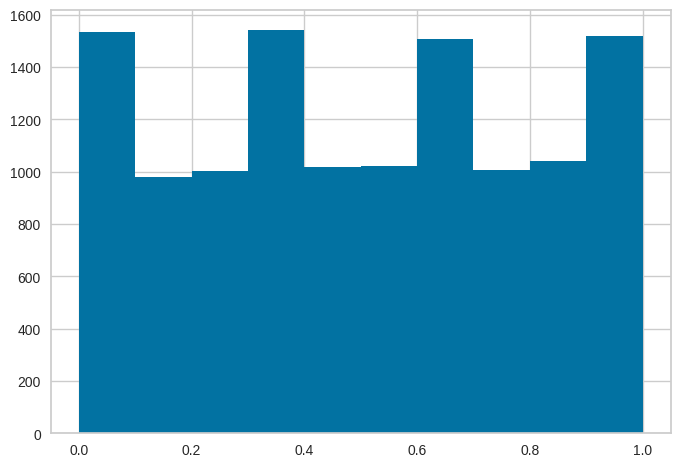

In [ ]:
get_config('X_train_transformed')['hr'].hist()

<Axes: >

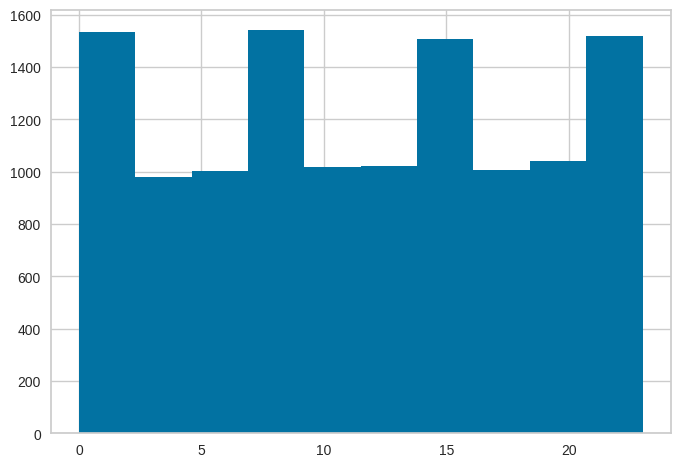

In [ ]:
get_config('X_train')['hr'].hist()

**Compare The models fo find the best one**

In [ ]:
best = compare_models()

Processing:   0%|          | 0/85 [00:00<?, ?it/s]

In [ ]:
# check available models
models()

Name  \
ID                                            
lr                        Linear Regression   
lasso                      Lasso Regression   
ridge                      Ridge Regression   
en                              Elastic Net   
lar                  Least Angle Regression   
llar           Lasso Least Angle Regression   
omp             Orthogonal Matching Pursuit   
br                           Bayesian Ridge   
ard       Automatic Relevance Determination   
par            Passive Aggressive Regressor   
ransac              Random Sample Consensus   
tr                       TheilSen Regressor   
huber                       Huber Regressor   
kr                             Kernel Ridge   
svm               Support Vector Regression   
knn                   K Neighbors Regressor   
dt                  Decision Tree Regressor   
rf                  Random Forest Regressor   
et                    Extra Trees Regressor   
ada                      AdaBoost Regressor   
gbr             Gradient Boosting Regressor   
mlp                           MLP Regressor   
xgboost           Extreme Gradient Boosting   
lightgbm    Light Gradient Boosting Machine   
catboost                 CatBoost Regressor   
dummy                       Dummy Regressor   

                                                  Reference  Turbo  
ID                                                                  
lr              sklearn.linear_model._base.LinearRegression   True  
lasso        sklearn.linear_model._coordinate_descent.Lasso   True  
ridge                     sklearn.linear_model._ridge.Ridge   True  
en        sklearn.linear_model._coordinate_descent.Elast...   True  
lar                  sklearn.linear_model._least_angle.Lars   True  
llar            sklearn.linear_model._least_angle.LassoLars   True  
omp       sklearn.linear_model._omp.OrthogonalMatchingPu...   True  
br                sklearn.linear_model._bayes.BayesianRidge   True  
ard               sklearn.linear_model._bayes.ARDRegression  False  
par       sklearn.linear_model._passive_aggressive.Passi...   True  
ransac         sklearn.linear_model._ransac.RANSACRegressor  False  
tr        sklearn.linear_model._theil_sen.TheilSenRegressor  False  
huber            sklearn.linear_model._huber.HuberRegressor   True  
kr                         sklearn.kernel_ridge.KernelRidge  False  
svm                                sklearn.svm._classes.SVR  False  
knn       sklearn.neighbors._regression.KNeighborsRegressor   True  
dt              sklearn.tree._classes.DecisionTreeRegressor   True  
rf           sklearn.ensemble._forest.RandomForestRegressor   True  
et             sklearn.ensemble._forest.ExtraTreesRegressor   True  
ada       sklearn.ensemble._weight_boosting.AdaBoostRegr...   True  
gbr          sklearn.ensemble._gb.GradientBoostingRegressor   True  
mlp       sklearn.neural_network._multilayer_perceptron....  False  
xgboost                        xgboost.sklearn.XGBRegressor   True  
lightgbm                     lightgbm.sklearn.LGBMRegressor   True  
catboost                    catboost.core.CatBoostRegressor   True  
dummy                          sklearn.dummy.DummyRegressor   True

In [ ]:
compare_tree_models = compare_models(include = ['dt', 'rf', 'et', 'gbr', 'xgboost', 'lightgbm', 'catboost','lr'])

Processing:   0%|          | 0/37 [00:00<?, ?it/s]

In [ ]:
compare_tree_models

In [ ]:
compare_tree_models_results = pull()
compare_tree_models_results

Model           MAE           MSE  \
catboost               CatBoost Regressor  2.532010e+01  1.645427e+03   
xgboost         Extreme Gradient Boosting  2.670270e+01  1.795587e+03   
lightgbm  Light Gradient Boosting Machine  2.698800e+01  1.846676e+03   
et                  Extra Trees Regressor  2.652010e+01  1.970933e+03   
rf                Random Forest Regressor  2.689680e+01  1.989028e+03   
dt                Decision Tree Regressor  3.602500e+01  3.749617e+03   
gbr           Gradient Boosting Regressor  4.832110e+01  5.041173e+03   
lr                      Linear Regression  1.095561e+08  1.459506e+20   

                  RMSE            R2   RMSLE          MAPE  TT (Sec)  
catboost  4.047150e+01  9.496000e-01  0.4379  4.481000e-01     3.455  
xgboost   4.228680e+01  9.450000e-01  0.4466  4.307000e-01     0.292  
lightgbm  4.289080e+01  9.435000e-01  0.4271  4.324000e-01     0.569  
et        4.424670e+01  9.397000e-01  0.3494  3.177000e-01     4.931  
rf        4.449430e+01  9.392000e-01  0.3520  3.259000e-01     5.273  
dt        6.115280e+01  8.850000e-01  0.4584  4.029000e-01     0.161  
gbr       7.093440e+01  8.455000e-01  0.6848  9.826000e-01     1.381  
lr        3.820348e+09 -4.449114e+15  1.1041  4.763307e+06     0.156

In [ ]:
best_mae_models_top3 = compare_models(sort = 'MAE', n_select = 3)

Processing:   0%|          | 0/87 [00:00<?, ?it/s]

In [ ]:
# list of top 3 models by MAE
best_mae_models_top3

 ExtraTreesRegressor(n_jobs=-1, random_state=123),
 XGBRegressor(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device='cpu', early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=-1,
              num_parallel_tree=None, random_state=123, ...)]

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.max_columns=999
df

hr      temp       hum  windspeed  cnt day_division  yr_0  yr_1  \
0       0 -1.334648  0.947372  -1.553889   16        night     1     0   
1       1 -1.438516  0.895539  -1.553889   40        night     1     0   
2       2 -1.438516  0.895539  -1.553889   32        night     1     0   
3       3 -1.334648  0.636370  -1.553889   13        night     1     0   
4       4 -1.334648  0.636370  -1.553889    1        night     1     0   
...    ..       ...       ...        ...  ...          ...   ...   ...   
17374  19 -1.230779 -0.141137  -0.211691  119      evening     0     1   
17375  20 -1.230779 -0.141137  -0.211691   89      evening     0     1   
17376  21 -1.230779 -0.141137  -0.211691   90      evening     0     1   
17377  22 -1.230779 -0.348473  -0.456099   61      evening     0     1   
17378  23 -1.230779  0.118032  -0.456099   49      evening     0     1   

       season_1  season_2  season_3  season_4  mnth_1  mnth_2  mnth_3  mnth_4  \
0             1         0         0         0       1       0       0       0   
1             1         0         0         0       1       0       0       0   
2             1         0         0         0       1       0       0       0   
3             1         0         0         0       1       0       0       0   
4             1         0         0         0       1       0       0       0   
...         ...       ...       ...       ...     ...     ...     ...     ...   
17374         1         0         0         0       0       0       0       0   
17375         1         0         0         0       0       0       0       0   
17376         1         0         0         0       0       0       0       0   
17377         1         0         0         0       0       0       0       0   
17378         1         0         0         0       0       0       0       0   

       mnth_5  mnth_6  mnth_7  mnth_8  mnth_9  mnth_10  mnth_11  mnth_12  \
0           0       0       0       0       0        0        0        0   
1           0       0       0       0       0        0        0        0   
2           0       0       0       0       0        0        0        0   
3           0       0       0       0       0        0        0        0   
4           0       0       0       0       0        0        0        0   
...       ...     ...     ...     ...     ...      ...      ...      ...   
17374       0       0       0       0       0        0        0        1   
17375       0       0       0       0       0        0        0        1   
17376       0       0       0       0       0        0        0        1   
17377       0       0       0       0       0        0        0        1   
17378       0       0       0       0       0        0        0        1   

       holiday_0  holiday_1  weekday_0  weekday_1  weekday_2  weekday_3  \
0              1          0          0          0          0          0   
1              1          0          0          0          0          0   
2              1          0          0          0          0          0   
3              1          0          0          0          0          0   
4              1          0          0          0          0          0   
...          ...        ...        ...        ...        ...        ...   
17374          1          0          0          1          0          0   
17375          1          0          0          1          0          0   
17376          1          0          0          1          0          0   
17377          1          0          0          1          0          0   
17378          1          0          0          1          0          0   

       weekday_4  weekday_5  weekday_6  workingday_0  workingday_1  \
0              0          0          1             1             0   
1              0          0          1             1             0   
2              0          0          1             1             0   
3              0          0          1             

**Comment:**

1.   I think there is a Linear Regression between our features and target, so I
choose "lr"




In [ ]:
# train linear regression with default fold=10
lr = create_model('lr')

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
Catboost = create_model('catboost')

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
catboost_results = pull()
print(type(catboost_results))
catboost_results

<class 'pandas.core.frame.DataFrame'>


MAE        MSE     RMSE      R2   RMSLE    MAPE
Fold                                                     
0     26.5936  1646.7870  40.5806  0.9475  0.4330  0.4672
1     24.9435  1541.4709  39.2616  0.9538  0.4367  0.4629
2     25.1361  1530.7463  39.1248  0.9542  0.4587  0.4578
3     25.2854  1677.3639  40.9556  0.9494  0.4326  0.4094
4     22.7544  1209.5021  34.7779  0.9591  0.4247  0.4356
5     25.1916  1656.2869  40.6975  0.9484  0.4358  0.4434
6     26.6432  2132.4260  46.1782  0.9366  0.4156  0.4100
7     24.4220  1535.0423  39.1796  0.9565  0.4454  0.4953
8     26.0179  1773.7297  42.1157  0.9443  0.4553  0.4432
9     26.2135  1750.9098  41.8439  0.9466  0.4411  0.4559
Mean  25.3201  1645.4265  40.4715  0.9496  0.4379  0.4481
Std    1.1064   221.8265   2.7352  0.0062  0.0124  0.0247

In [ ]:
# train Catboost Regression with fold=3
Catboost = create_model('catboost', fold=3)

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
# train catboost and return train score as well alongwith CV
create_model('catboost', return_train_score=True)

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

**Tune Model**

In [ ]:
# train a dt model with default params
dt = create_model('dt')

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
# tune hyperparameters of dt
tuned_dt = tune_model(dt)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [ ]:
dt

DecisionTreeRegressor(random_state=123)

In [ ]:
# define tuning grid
dt_grid = {'max_depth' : [None, 2, 4, 6, 8, 10, 12]}

# tune model with custom grid and metric = MAE
tuned_dt = tune_model(dt, custom_grid = dt_grid, optimize = 'MAE')

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 7 candidates, totalling 70 fits


In [ ]:
# to access the tuner object you can set return_tuner = True
tuned_dt, tuner = tune_model(dt, return_tuner=True)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [ ]:
tuned_dt

DecisionTreeRegressor(criterion='friedman_mse', max_depth=10, max_features=1.0,
                      min_impurity_decrease=0.01, min_samples_leaf=2,
                      min_samples_split=9, random_state=123)

In [ ]:
tuner

RandomizedSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=False),
                   estimator=Pipeline(memory=Memory(location=None),
                                      steps=[('numerical_imputer',
                                              TransformerWrapper(include=['hr',
                                                                          'temp',
                                                                          'hum',
                                                                          'windspeed',
                                                                          'yr_0',
                                                                          'yr_1',
                                                                          'season_1',
                                                                          'season_2',
                                                                          'season_3',
                                                                          'season_4',
                                                                          'mnth_1',
                                                                          'mnth_2',
                                                                          'mnth_3',
                                                                          'mnth_4',
                                                                          'mnth_5',
                                                                          'mnth_6',
                                                                          'mnth_7',
                                                                          'mnth_8',
                                                                          'mnth_9',
                                                                          'mnt...
                                                                        7, 8, 9,
                                                                        10, 11,
                                                                        12, 13,
                                                                        14, 15,
                                                                        16],
                                        'actual_estimator__max_features': [1.0,
                                                                           'sqrt',
                                                                           'log2'],
                                        'actual_estimator__min_impurity_decrease': [0,
                                                                                    0.0001,
                                                                                    0.001,
                                                                                    0.01,
                                                                                    0.0002,
                                                                                    0.002,
                                                                                    0.02,
                                                                                    0.0005,
                                                                                    0.005,
                                                                                    0.05,
                                                                                    0.1,
                                                                                    0.2,
                                                                                    0.3,
                                                                                    0.4,
                                                                                    0.5],
                                        'actual_estimator__min_samples_leaf': [2,
                                  

In [ ]:
# tune dt using optuna
tuned_dt = tune_model(dt, search_library = 'optuna')

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

[I 2023-11-28 04:59:43,850] Searching the best hyperparameters using 12165 samples...
[I 2023-11-28 05:01:16,541] Finished hyperparameter search!


**Ensemble Model**

In [ ]:
# ensemble with bagging
ensemble_model(dt, method = 'Bagging')

Processing:   0%|          | 0/6 [00:00<?, ?it/s]

BaggingRegressor(estimator=DecisionTreeRegressor(random_state=123),
                 random_state=123)

In [ ]:
# ensemble with boosting
ensemble_model(dt, method = 'Boosting')

Processing:   0%|          | 0/6 [00:00<?, ?it/s]

AdaBoostRegressor(estimator=DecisionTreeRegressor(random_state=123),
                  n_estimators=10, random_state=123)

**Blend Models**

In [ ]:
# top 3 models based on mae
best_mae_models_top3

 ExtraTreesRegressor(n_jobs=-1, random_state=123),
 XGBRegressor(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device='cpu', early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=-1,
              num_parallel_tree=None, random_state=123, ...)]

In [ ]:
blend_models(best_mae_models_top3)

Processing:   0%|          | 0/6 [00:00<?, ?it/s]

VotingRegressor(estimators=[('CatBoost Regressor',
                             <catboost.core.CatBoostRegressor object at 0x7a18662443d0>),
                            ('Extra Trees Regressor',
                             ExtraTreesRegressor(n_jobs=-1, random_state=123)),
                            ('Extreme Gradient Boosting',
                             XGBRegressor(base_score=None, booster='gbtree',
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device='cpu',
                                          earl...
                                          gamma=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=None, max_bin=None,
                                          max_cat_threshold=None,
                                          max_cat_to_onehot=None,
                                          max_delta_step=None, max_depth=None,
                                          max_leaves=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          multi_strategy=None,
                                          n_estimators=None, n_jobs=-1,
                                          num_parallel_tree=None,
                                          random_state=123, ...))],
                n_jobs=-1)

In [ ]:
# stack models
stack_models(best_mae_models_top3)

Processing:   0%|          | 0/6 [00:00<?, ?it/s]

StackingRegressor(cv=5,
                  estimators=[('CatBoost Regressor',
                               <catboost.core.CatBoostRegressor object at 0x7a18666aae60>),
                              ('Extra Trees Regressor',
                               ExtraTreesRegressor(n_jobs=-1,
                                                   random_state=123)),
                              ('Extreme Gradient Boosting',
                               XGBRegressor(base_score=None, booster='gbtree',
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device='cp...
                                            learning_rate=None, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=None, n_jobs=-1,
                                            num_parallel_tree=None,
                                            random_state=123, ...))],
                  final_estimator=LinearRegression(n_jobs=-1), n_jobs=-1,
                  passthrough=True)

**Interpret Model**

In [ ]:
# train lightgbm model
lightgbm = create_model('lightgbm')

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

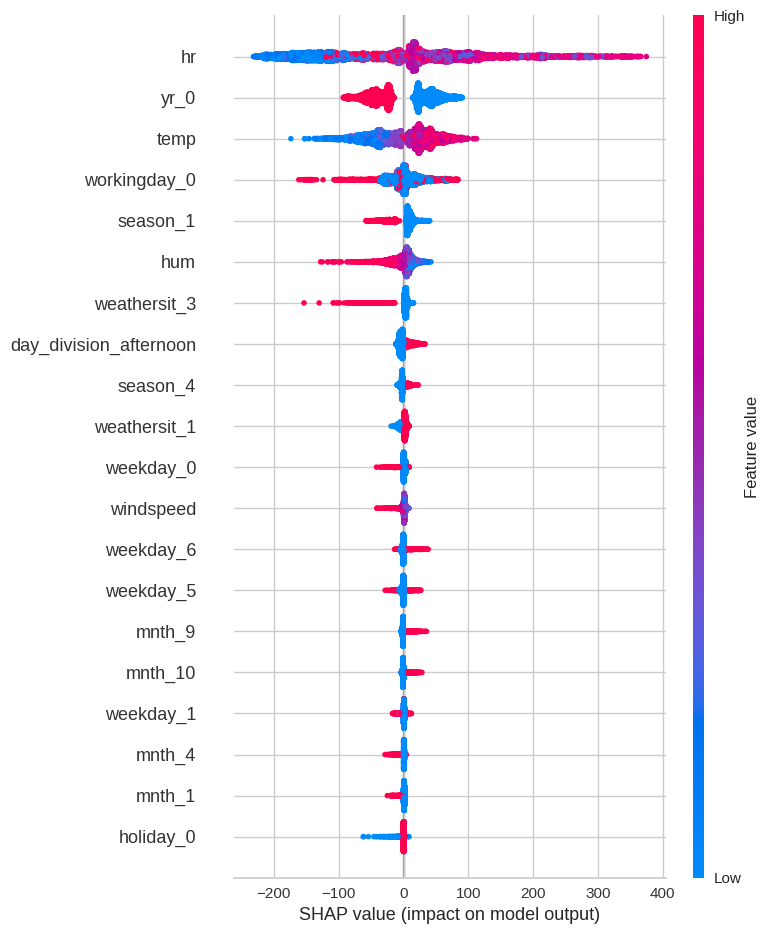

In [ ]:
# interpret summary model
interpret_model(lightgbm, plot = 'summary')

In [ ]:
# reason plot for test set observation 1
interpret_model(lightgbm, plot = 'reason', observation = 1)

In [ ]:
# help(interpret_model)

In [ ]:
# get leaderboard
lb = get_leaderboard()
lb

Processing:   0%|          | 0/67 [00:00<?, ?it/s]

Model Name  \
Index                                    
0                    Linear Regression   
1                     Lasso Regression   
2                     Ridge Regression   
3                          Elastic Net   
4               Least Angle Regression   
...                                ...   
61                   Bagging Regressor   
62                  AdaBoost Regressor   
63                    Voting Regressor   
64                  Stacking Regressor   
65     Light Gradient Boosting Machine   

                                                   Model           MAE  \
Index                                                                    
0      (TransformerWrapper(include=['hr', 'temp', 'hu...  1.095561e+08   
1      (TransformerWrapper(include=['hr', 'temp', 'hu...  9.550430e+01   
2      (TransformerWrapper(include=['hr', 'temp', 'hu...  9.497020e+01   
3      (TransformerWrapper(include=['hr', 'temp', 'hu...  1.154911e+02   
4      (TransformerWrapper(include=['hr', 'temp', 'hu...  2.307846e+12   
...                                                  ...           ...   
61     (TransformerWrapper(include=['hr', 'temp', 'hu...  2.843010e+01   
62     (TransformerWrapper(include=['hr', 'temp', 'hu...  2.907290e+01   
63     (TransformerWrapper(include=['hr', 'temp', 'hu...  2.377070e+01   
64     (TransformerWrapper(include=['hr', 'temp', 'hu...  2.367900e+01   
65     (TransformerWrapper(include=['hr', 'temp', 'hu...  2.698800e+01   

                MSE          RMSE            R2   RMSLE          MAPE  
Index                                                                  
0      1.459506e+20  3.820348e+09 -4.449114e+15  1.1041  4.763307e+06  
1      1.636483e+04  1.278946e+02  4.986000e-01  1.0804  2.897800e+00  
2      1.604866e+04  1.266487e+02  5.083000e-01  1.0829  3.110100e+00  
3      2.311241e+04  1.519825e+02  2.921000e-01  1.3667  4.985200e+00  
4      6.476586e+28  8.047724e+13 -1.974303e+24  4.7574  1.003411e+11  
...             ...           ...           ...     ...           ...  
61     2.240652e+03  4.723740e+01  9.314000e-01  0.3669  3.433000e-01  
62     2.447388e+03  4.935790e+01  9.250000e-01  0.3615  3.148000e-01  
63     1.541469e+03  3.915350e+01  9.528000e-01  0.3698  3.375000e-01  
64     1.523275e+03  3.891840e+01  9.534000e-01  0.3949  3.725000e-01  
65     1.846676e+03  4.289080e+01  9.435000e-01  0.4271  4.324000e-01  

[65 rows x 8 columns]

In [ ]:
# select the best model based on MAE
lb.sort_values(by='MAE', ascending=True)['Model'].iloc[0]

Pipeline(memory=Memory(location=None),
         steps=[('numerical_imputer',
                 TransformerWrapper(include=['hr', 'temp', 'hum', 'windspeed',
                                             'yr_0', 'yr_1', 'season_1',
                                             'season_2', 'season_3', 'season_4',
                                             'mnth_1', 'mnth_2', 'mnth_3',
                                             'mnth_4', 'mnth_5', 'mnth_6',
                                             'mnth_7', 'mnth_8', 'mnth_9',
                                             'mnth_10', 'mnth_11', 'mnth_12',
                                             'holiday_0', 'holiday_1',
                                             'weekday_0', 'weekday_1',
                                             'weekday_...
                                                             learning_rate=None,
                                                             max_bin=None,
                                                             max_cat_threshold=None,
                                                             max_cat_to_onehot=None,
                                                             max_delta_step=None,
                                                             max_depth=None,
                                                             max_leaves=None,
                                                             min_child_weight=None,
                                                             missing=nan,
                                                             monotone_constraints=None,
                                                             multi_strategy=None,
                                                             n_estimators=None,
                                                             n_jobs=-1,
                                                             num_parallel_tree=None,
                                                             random_state=123, ...))],
                                   final_estimator=LinearRegression(n_jobs=-1),
                                   n_jobs=-1, passthrough=True)]])

In [ ]:
# help(get_leaderboard)

In [ ]:
# find best model based on CV metrics
automl()

StackingRegressor(cv=5,
                  estimators=[('CatBoost Regressor',
                               <catboost.core.CatBoostRegressor object at 0x7a186de74370>),
                              ('Extra Trees Regressor',
                               ExtraTreesRegressor(n_jobs=-1,
                                                   random_state=123)),
                              ('Extreme Gradient Boosting',
                               XGBRegressor(base_score=None, booster='gbtree',
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device='cp...
                                            learning_rate=None, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=None, n_jobs=-1,
                                            num_parallel_tree=None,
                                            random_state=123, ...))],
                  final_estimator=LinearRegression(n_jobs=-1), n_jobs=-1,
                  passthrough=True)